In [104]:
import pandas as pd
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [91]:
#ser_ts_sum = train[train['trx_category'] == 'POS'][['cl_id', 'target_sum', 'year', 'month']].groupby(by=['cl_id', 'year', 'month']).sum().astype('int64')
#ser_pos_count = train[train['trx_category'] == 'POS'][['cl_id', 'target_sum', 'year', 'month']].groupby(by=['cl_id', 'year', 'month']).count().rename(columns={'target_sum':'count_POS'}).astype('int64')
#ser_notpos_count = train[train['trx_category'] != 'POS'][['cl_id', 'target_sum', 'year', 'month']].groupby(by=['cl_id', 'year', 'month']).count().rename(columns={'target_sum':'count_notPOS'}).astype('int64')
#train = train.drop(axis=1, labels='target_sum').join(ser_ts_sum, on=['cl_id', 'year', 'month'], how='left').join(ser_pos_count, on=['cl_id', 'year', 'month'], how='left').join(ser_notpos_count, on=['cl_id', 'year', 'month'], how='left')


'''
[description]
InsertDataFrame - pandas dataframe
ColumnName - name of transforming column
'''
def MakeDateYearMonth(InsertDataFrame, ColumnName):
    df = InsertDataFrame.copy()
    df[ColumnName] = pd.to_datetime(df[ColumnName])
    df['year'] = df[ColumnName].dt.year
    df['month'] = df[ColumnName].dt.month
    return df    

'''
[description]
InsertDataFrame - pandas dataframe
GroupByList - list of column names
TargetColumn - name of one column in dataframe, string
TargetName - name of returning column
'''
def groupbysum(InsertDataFrame, GroupByList, TargetColumn, TargetName):
    df = InsertDataFrame.copy()
    sdtype = df[TargetColumn].dtype
    ser = df.groupby(by=GroupByList).sum().rename(columns={TargetColumn:TargetName}).astype(sdtype)
    return ser
    
'''
[description]
InsertDataFrame - pandas dataframe
GroupByList - list of column names
TargetColumn - name of one column in dataframe, string
TargetName - name of returning column
'''
def groupbycount(InsertDataFrame, GroupByList, TargetColumn, TargetName):
    df = InsertDataFrame.copy()
    ser = df.groupby(by=GroupByList).count().rename(columns={TargetColumn:TargetName}).astype('int64')
    return ser    

'''
[description]
InsertDataFrame - pandas dataframe
SeriesList - list of pandas series
OnJoin - string or list of column name(s)
'''
def DfLeftJoinSer(InsertDataFrame, SeriesList, OnJoin):
    df = InsertDataFrame.copy()
    for i in SeriesList:
        df = df.join(i, on=OnJoin, how='left')
    return df

In [56]:
url_train = 'https://raw.githubusercontent.com/Hitriihoma/Machine-learning-course-task/master/train.csv'
url_test = 'https://raw.githubusercontent.com/Hitriihoma/Machine-learning-course-task/master/test.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [57]:
train2 = train.copy()

In [110]:
train = train2.copy()
train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0.0


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 9 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_sum      490513 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 33.7+ MB


# Метрики для модели
год, месяц - сколько берём? надо смотреть сколько есть  
количество POS-транзакций  
количество не-POS-транзакций  
сумма POS-транзакций  
сумма не- POS-транзакций

In [111]:
# Входные сырые данные + колонки
train = MakeDateYearMonth(train, 'PERIOD')
group_list = ['cl_id', 'year', 'month']
ser_ts_sum = groupbysum(train[train['trx_category'] == 'POS'][['cl_id', 'target_sum', 'year', 'month']],
                       group_list,
                       'target_sum',
                       'target_sum')
ser_pos_amount_sum = groupbysum(train[train['trx_category'] == 'POS'][['cl_id', 'amount', 'year', 'month']],
                       group_list,
                       'amount',
                       'pos_sum')
ser_notpos_amount_sum = groupbysum(train[train['trx_category'] != 'POS'][['cl_id', 'amount', 'year', 'month']],
                       group_list,
                       'amount',
                       'notpos_sum')
ser_pos_count = groupbycount(train[train['trx_category'] == 'POS'][['cl_id', 'target_sum', 'year', 'month']],
                       group_list,
                       'target_sum',
                       'count_pos')
ser_notpos_count = groupbycount(train[train['trx_category'] != 'POS'][['cl_id', 'target_sum', 'year', 'month']],
                       group_list,
                       'target_sum',
                       'count_notpos')

train = DfLeftJoinSer(train.drop(axis=1, labels=['PERIOD','MCC', 'channel_type', 'currency', 'TRDATETIME', 'amount', 'trx_category', 'target_sum']).drop_duplicates(),
                      [ser_ts_sum, ser_pos_amount_sum, ser_notpos_amount_sum, ser_pos_count, ser_notpos_count],
                      ['cl_id', 'year', 'month'])
train.head()

,cl_id,year,month,target_sum,pos_sum,notpos_sum,count_pos,count_notpos
0,0,2017,1,0.00,7821.00,56562.00,3.0,2.0
5,1,2017,1,0.00,122578.04,145000.00,101.0,3.0
109,5,2017,1,36209504.25,290500.75,255868.38,111.0,31.0
251,9,2017,1,0.00,12365.09,836950.00,29.0,10.0
290,10,2017,1,0.00,200956.11,923387.88,374.0,89.0


# Анализ данных
какой месяц для модели текущий  
сколько для каждого клиента известно месяцев

In [112]:
# количество уникальных клиентов
len(train.cl_id.unique())

5000

['2016-1', '2017-1', 'target'] [215670.59, 123211.06, 0.0]


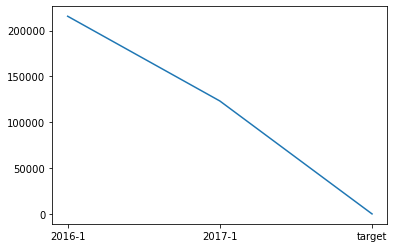

['2017-1', 'target'] [200469.8, 132192.0]


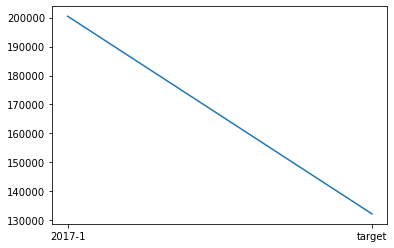

['2017-1', 'target'] [113185.76, 11345.76]


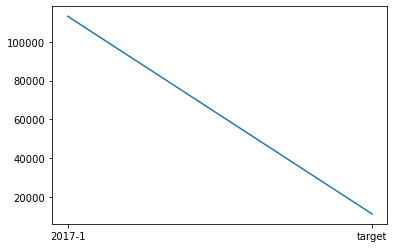

['2016-1', '2017-1', 'target'] [435564.0, 1035836.0, 433.83000000000004]


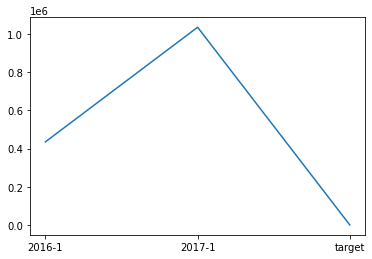

['2016-1', '2017-1', 'target'] [435564.0, 1035836.0, 433.83000000000004]


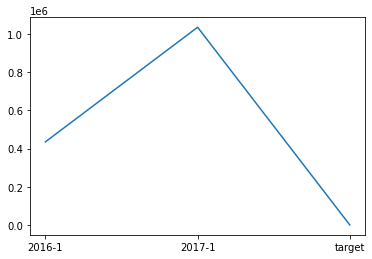

['2017-1', 'target'] [168493.49, 4596347.6000000015]


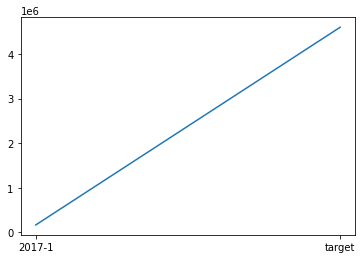

['2017-1', '2016-1', 'target'] [309346.98, 24750.0, 154412.68]


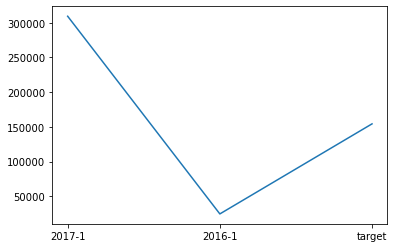

['2017-1', '2016-1', 'target'] [309346.98, 24750.0, 154412.68]


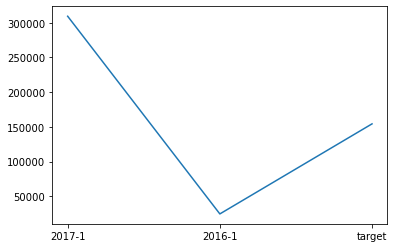

['2017-1', '2016-1', 'target'] [414387.42000000004, 35480.34, 3767720.0]


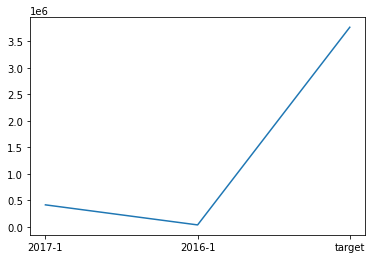

['2017-1', '2016-1', 'target'] [414387.42000000004, 35480.34, 3767720.0]


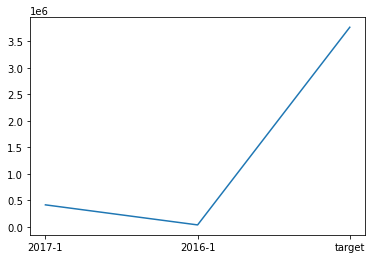

['2017-1', 'target'] [232963.0, 32205648.39999993]


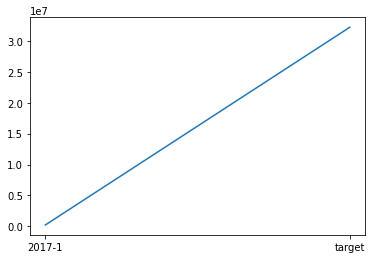

['2018-1', '2017-1', 'target'] [123313.81000000003, 297770.08999999997, 38819198.25]


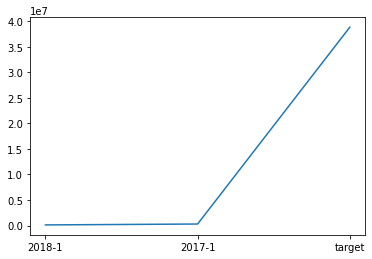

['2018-1', '2017-1', 'target'] [123313.81000000003, 297770.08999999997, 38819198.25]


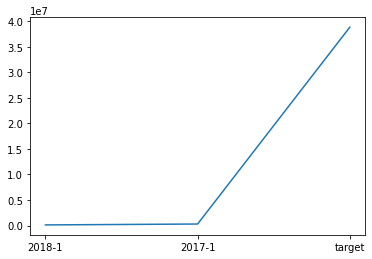

['2016-1', '2017-1', 'target'] [nan, 138024.0, 0.0]


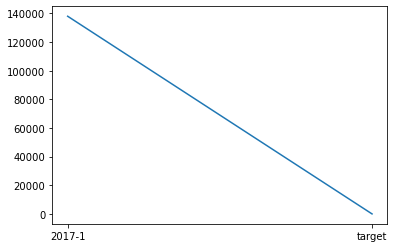

['2016-1', '2017-1', 'target'] [nan, 138024.0, 0.0]


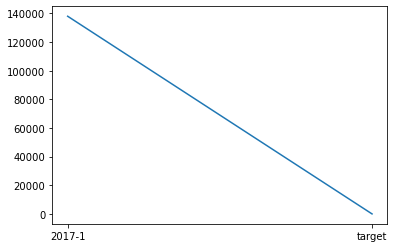

['2017-1', 'target'] [689896.2, 0.0]


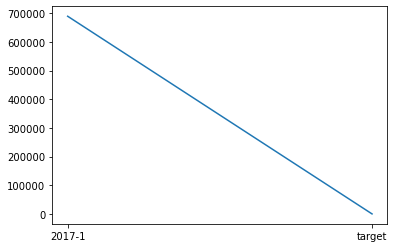

['2017-1', 'target'] [396134.3500000001, 3782956.9999999935]


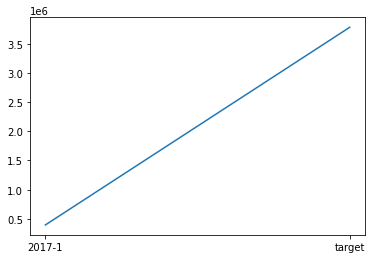

['2017-1', 'target'] [677984.8999999999, 0.0]


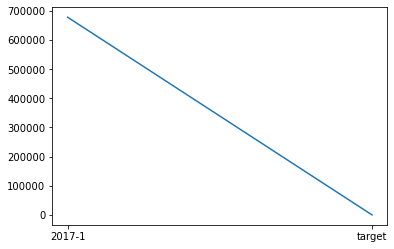

['2017-1', 'target'] [444559.48000000004, 0.0]


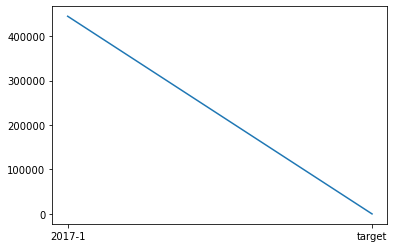

['2017-1', 'target'] [445286.55, 9951396.839999985]


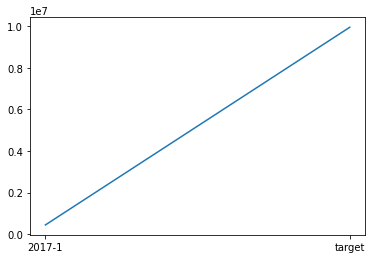

,cl_id,year,month,target_sum,pos_sum,notpos_sum,count_pos,count_notpos
0,48,2017,1,9951396.84,194836.55,250450.0,84.0,24.0


In [139]:
for i in train.cl_id[10:30]:
    fig = plt.figure()
    x = list()
    y = list()
    temp_df = train[train['cl_id'] == i].reset_index(drop=True)
    for ji in temp_df.index:
        j = temp_df.iloc[ji]
        x.append(str(int(j.year))+ '-' + str(int(j.month)))
        y.append(j.pos_sum + j.notpos_sum)
    x.append('target')
    y.append(j.target_sum)
    print(x,y)
    plt.plot(x,y)
    plt.show()
plt.close('all')  
temp_df

0        0
5        1
109      5
251      9
290     10
753     11
970     14
1106    20
1183    21
1184    22
Name: cl_id, dtype: int64

In [122]:
for ji in temp_df.index:
    print(temp_df.iloc[ji].year)

2017.0


# Формирование выборки

In [63]:
# Пример формирования тестовой выборки. Возьмем 10 случайных пользвоателей.
users_sample = train['cl_id'].sample(10).values
user_sample_df = train[(train['cl_id'].isin(users_sample))][:]
user_sample_df.head(5)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,year,month,target_sum,count_POS,count_notPOS
48794,2017-01-04,901,5814,type2,810,29APR17:00:00:00,402.0,POS,2017,1,58147131.81,223.0,17.0
48795,2017-01-04,901,5261,type2,810,15APR17:00:00:00,28490.5,POS,2017,1,58147131.81,223.0,17.0
48799,2017-01-03,901,5921,type2,810,03MAR17:00:00:00,389.0,POS,2017,1,58147131.81,223.0,17.0
48803,2017-01-04,901,5814,type2,810,14APR17:00:00:00,99.0,POS,2017,1,58147131.81,223.0,17.0
48804,2017-01-04,901,5921,type2,810,20APR17:00:00:00,385.0,POS,2017,1,58147131.81,223.0,17.0


In [64]:
# Для данных пользователей необходимо спрогнозировать рассчитанную величину'target_sum'.
user_sample_df[['cl_id','target_sum']].drop_duplicates()

,cl_id,target_sum
48794,901,58147131.81
74524,1339,7079905.92
74617,1339,2876211.78
99591,1813,921600.00
134218,2414,2637756.90
152544,2715,48508409.67
261930,4977,0.00
352786,7082,0.00
359055,7213,0.00
404364,8274,151400.62
